Python for Data Analysis 2 version 
第5章 pandas 入门

In [1]:
import pandas as pd 
from pandas import Series, DataFrame


5.1 pandas 的数据结构介绍
# 忽略 Series 

In [2]:
data={"state":["ohio",'ohio','ohio','Nevada','Nevada','Nevada'],
     'year':[2000,2001,2002,2001,2002,2003],
     'pop':[1.5,1.7,3.6, 2.4, 2.9, 3.2]}

frame=pd.DataFrame(data)

frame

,pop,state,year
0,1.5,ohio,2000
1,1.7,ohio,2001
2,3.6,ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [3]:
frame.head()

,pop,state,year
0,1.5,ohio,2000
1,1.7,ohio,2001
2,3.6,ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


按照指定的顺序排列

In [4]:
pd.DataFrame(data, columns=['year','state','pop'])

,year,state,pop
0,2000,ohio,1.5
1,2001,ohio,1.7
2,2002,ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [6]:
frame2=pd.DataFrame(data, columns=['year','state','pop'],
                   index=['one','two','three','four','five','six'])

frame2

,year,state,pop
one,2000,ohio,1.5
two,2001,ohio,1.7
three,2002,ohio,3.6
four,2001,Nevada,2.4
five,2002,Nevada,2.9
six,2003,Nevada,3.2


In [7]:
frame2['state']

one        ohio
two        ohio
three      ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [8]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [9]:
frame2.state

one        ohio
two        ohio
three      ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [10]:
# 访问行
frame2.loc['three']

year     2002
state    ohio
pop       3.6
Name: three, dtype: object

列 可以用赋值的方式进行修改 

In [12]:
frame2['debt']=16.5
frame2

,year,state,pop,debt
one,2000,ohio,1.5,16.5
two,2001,ohio,1.7,16.5
three,2002,ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [16]:
import numpy as np
frame2['debt']=np.arange(6)
frame2

,year,state,pop,debt
one,2000,ohio,1.5,0
two,2001,ohio,1.7,1
three,2002,ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


长度匹配问题

In [17]:
val=pd.Series([-1.2, -1.5, -1.7], index=['two','four','five'])
frame2['debt']=val
frame2

,year,state,pop,debt
one,2000,ohio,1.5,NaN
two,2001,ohio,1.7,-1.2
three,2002,ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [19]:
frame2['estern']= frame2.state=="ohio"
frame2

,year,state,pop,debt,estern
one,2000,ohio,1.5,NaN,True
two,2001,ohio,1.7,-1.2,True
three,2002,ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


del 删除列

In [22]:
del frame2["estern"]
frame2

,year,state,pop,debt
one,2000,ohio,1.5,NaN
two,2001,ohio,1.7,-1.2
three,2002,ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


嵌套字典

In [25]:
pop={'nevada':{2001:2.4, 2002:2.9},
    'ohio':{2000:1.5, 2001:1.7, 2002:3.6}}

frame3=pd.DataFrame(pop)
frame3

,nevada,ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [26]:
frame3.T

,2000,2001,2002
nevada,NaN,2.4,2.9
ohio,1.5,1.7,3.6


指明索引

In [27]:
pd.DataFrame(pop, index=[2001,2002,2003])


,nevada,ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


设置属性 index  columns name 

In [29]:
frame3.index.name='year'
frame3.columns.name='state'
frame3

state,nevada,ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [31]:
frame3.values  # 所有的值

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

In [32]:
frame2.values


array([[2000, 'ohio', 1.5, nan],
       [2001, 'ohio', 1.7, -1.2],
       [2002, 'ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

索引对象
# Note: Series & DataFrame 之间的区别
# 一行 和 多行的 区别

In [36]:
import pandas as pd
obj=pd.Series(range(3), index=['a','b','c'])
obj


a    0
b    1
c    2
dtype: int32

pandas 的 index 可以包含重复的标签

In [37]:
dup_labels=pd.Index(['foo','foo','bar','bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')



5.2 基本功能 
重新索引  reindex 

In [38]:
obj=pd.Series([4.5, 7.2, -5.3, 3.6], index=['d','b','a','c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [40]:
obj2=obj.reindex(['a','b','c','d','e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

重新索引可能需要 一些 插值处理， 
method 选择 ffill

In [42]:
obj3=pd.Series(['blue','purple','yellow'], index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [44]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

只传递一个序列时， 会重新索引结果的行 

In [48]:
frame=pd.DataFrame(np.arange(9).reshape((3,3)),
                  index=['a','c','d'],
                  columns=['ohio','texas','california'])

frame 


,ohio,texas,california
a,0,1,2
c,3,4,5
d,6,7,8


In [47]:
frame2=frame.reindex(['a','b','c','d'])
frame2

,ohio,texas,california
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


列 可以用 columns 关键字重新索引

In [49]:
states=['texas','utah','california']
frame.reindex(columns=states)

,texas,utah,california
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


丢弃指定轴上的项  drop

In [50]:
obj=pd.Series(np.arange(5), index=['a','b','c','d','e'])
obj

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [52]:
new_obj=obj.drop('c')
new_obj

a    0
b    1
d    3
e    4
dtype: int32

In [53]:
obj

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [55]:
obj.drop(['d','c'])

a    0
b    1
e    4
dtype: int32

In [56]:
obj  # drop() 不改变 obj 对象本身

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [58]:
data=pd.DataFrame(np.arange(16).reshape((4,4)),
                 index=['ohio','colorado','utah','New York'],
                 columns=['one','two','three','four'])
data

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
utah,8,9,10,11
New York,12,13,14,15


In [59]:
data.drop(['colorado','ohio'])
# 直接drop 
# 是 drop 行  

,one,two,three,four
utah,8,9,10,11
New York,12,13,14,15


In [60]:
data  # 不发生变化

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
utah,8,9,10,11
New York,12,13,14,15


In [62]:
data.drop('two', axis=1) 
# 删除 列 必须指明 axis=1 要不然会有 error 

,one,three,four
ohio,0,2,3
colorado,4,6,7
utah,8,10,11
New York,12,14,15


In [63]:
data.drop(['two','four'], axis='columns')

,one,three
ohio,0,2
colorado,4,6
utah,8,10
New York,12,14


就地删除 不会返回新的对象

In [64]:
obj

a    0
b    1
c    2
d    3
e    4
dtype: int32

In [72]:
obj.drop('b',inplace=True)
obj

d    3
e    4
dtype: int32

索引 选取 和 过滤 

In [73]:
obj=pd.Series(np.arange(4), index=['a','b','c','d'])
obj

a    0
b    1
c    2
d    3
dtype: int32

In [74]:
obj['b']

1

In [75]:
obj[2:4]

c    2
d    3
dtype: int32

In [76]:
obj[['b','a','d']]

b    1
a    0
d    3
dtype: int32

In [77]:
obj[[1,3]]

b    1
d    3
dtype: int32

In [78]:
obj[obj<2]

a    0
b    1
dtype: int32

利用标签的切片运算与普通的 python 切片运算不同， 其末端是包含的 

In [79]:
obj['b':'c']

b    1
c    2
dtype: int32

In [81]:
obj['b':'c']=5
obj

a    0
b    5
c    5
d    3
dtype: int32

In [82]:
data=pd.DataFrame(np.arange(16).reshape((4,4)),
                 index=['ohio','colorado','utah','New York'],
                 columns=['one','two','three','four'])
data


,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
utah,8,9,10,11
New York,12,13,14,15


In [83]:
data['two']  # 默认访问列 

ohio         1
colorado     5
utah         9
New York    13
Name: two, dtype: int32

In [84]:
data[['three','one']]

,three,one
ohio,2,0
colorado,6,4
utah,10,8
New York,14,12


特殊情况

In [85]:
data[:2]  # 第一行 和  第二行 

,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7


In [86]:
data[data['three']>5]

,one,two,three,four
colorado,4,5,6,7
utah,8,9,10,11
New York,12,13,14,15


In [87]:
data<5

,one,two,three,four
ohio,True,True,True,True
colorado,True,False,False,False
utah,False,False,False,False
New York,False,False,False,False


In [92]:
data[data<5]

,one,two,three,four
ohio,0.0,1.0,2.0,3.0
colorado,4.0,NaN,NaN,NaN
utah,NaN,NaN,NaN,NaN
New York,NaN,NaN,NaN,NaN


In [94]:
data[data<5]=0
data

,one,two,three,four
ohio,0,0,0,0
colorado,0,5,6,7
utah,8,9,10,11
New York,12,13,14,15


用 loc 和 iloc 进行选取
loc 轴标签  iloc 整数索引

In [95]:
data.loc['colorado',['two','three']]

two      5
three    6
Name: colorado, dtype: int32

In [96]:
data.iloc[2,[3,0,1]]

four    11
one      8
two      9
Name: utah, dtype: int32

In [97]:
data.iloc[:,:3][data.three>5]

,one,two,three
colorado,0,5,6
utah,8,9,10
New York,12,13,14


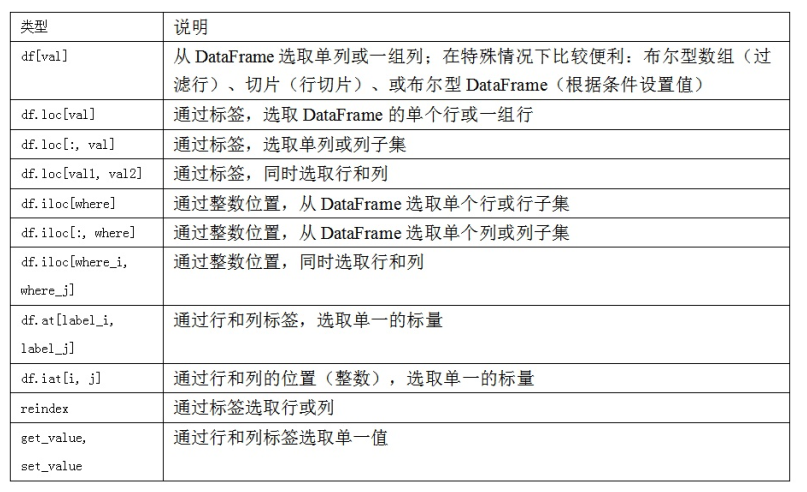

整数索引

In [98]:
ser=pd.Series(np.arange(3))
ser

0    0
1    1
2    2
dtype: int32

In [99]:
ser[-1]

KeyError: -1

In [102]:
ser2=pd.Series(np.arange(3),index=["a",'b','c'])
ser2[-1]
# ser 和 ser2 有什么不同？

2

整数索引

In [103]:
ser[:1]

0    0
dtype: int32

In [104]:
ser.loc[:1]

0    0
1    1
dtype: int32

In [105]:
ser.iloc[:1]

0    0
dtype: int32

算术运算和数据对齐

In [108]:
s1=pd.Series([7.3,-2.5,3.4, 1.5], index=['a','c','d','e'])
s2=pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a','c','e','f','g'])

s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [109]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [110]:
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [120]:
df1=pd.DataFrame(np.arange(9).reshape((3,3)),
                 columns=list('bcd')
                 ,index=['ohio','texas','colorado'])
df1

,b,c,d
ohio,0,1,2
texas,3,4,5
colorado,6,7,8


In [121]:
df2=pd.DataFrame(np.arange(12).reshape((4,3)), 
                columns=list('bde'), index=['utah','ohio','texas','oregon'])
df2

,b,d,e
utah,0,1,2
ohio,3,4,5
texas,6,7,8
oregon,9,10,11


In [122]:
df1+df2

,b,c,d,e
colorado,NaN,NaN,NaN,NaN
ohio,3.0,NaN,6.0,NaN
oregon,NaN,NaN,NaN,NaN
texas,9.0,NaN,12.0,NaN
utah,NaN,NaN,NaN,NaN


在算数方法中填充值 

In [125]:
df1=pd.DataFrame(np.arange(12).reshape((3,4)), 
                columns=list('abcd'))

In [123]:
df2=pd.DataFrame(np.arange(20).reshape((4,5)),
                columns=list('abcde'))
df2.loc[1,'b']=np.nan

In [126]:
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [127]:
df2

,a,b,c,d,e
0,0,1.0,2,3,4
1,5,NaN,7,8,9
2,10,11.0,12,13,14
3,15,16.0,17,18,19


In [128]:
df1+df2
# 没有重叠的位置 就会产生 NA value 

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


使用 add() 方法， 传入 df2 以及 一个 fill_value 参数：

In [129]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


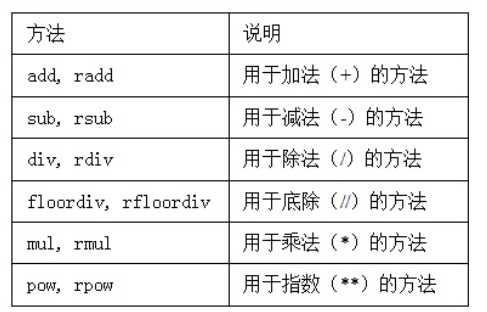

函数应用和映射

In [131]:
frame=pd.DataFrame(np.random.randn(4,3), columns=list('bde'),
                  index=['utah','ohio','texas','oregon'])
frame

,b,d,e
utah,1.715194,0.139078,-1.903197
ohio,0.810387,-0.994736,-0.116311
texas,-1.700003,0.944150,0.262567
oregon,0.211342,0.361594,-0.434588


In [132]:
np.abs(frame)

,b,d,e
utah,1.715194,0.139078,1.903197
ohio,0.810387,0.994736,0.116311
texas,1.700003,0.944150,0.262567
oregon,0.211342,0.361594,0.434588


In [134]:
frame

,b,d,e
utah,1.715194,0.139078,-1.903197
ohio,0.810387,-0.994736,-0.116311
texas,-1.700003,0.944150,0.262567
oregon,0.211342,0.361594,-0.434588


In [133]:
f=lambda x: x.max()-x.min()
frame.apply(f)
# 按照列计算

b    3.415197
d    1.938886
e    2.165764
dtype: float64

In [135]:
frame.apply(f, axis='columns')

utah      3.618391
ohio      1.805123
texas     2.644153
oregon    0.796182
dtype: float64

排序与排名

In [137]:
obj=pd.Series(range(4), index=['d','a','b','c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int32

In [138]:
frame=pd.DataFrame(np.arange(8).reshape((2,4)),
                  index=['three','one'],
                  columns=['d','a','b','c'])

frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [139]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [140]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


按照值排序

In [141]:
obj=pd.Series([4,7,-3,2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [142]:
obj=pd.Series([4, np.nan, 7, np.nan, -3,2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [143]:
frame=pd.DataFrame({'b':[4,7,-3,2], 'a':[0,1,0,1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [144]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [145]:
frame.sort_values(by=['a','b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [146]:
obj=pd.Series([7,-5,7,4,2,0,4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

带有重复标签的轴索引

In [147]:
obj=pd.Series(range(5), index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int32

In [148]:
obj.index.is_unique

False

In [149]:
obj['a']

a    0
a    1
dtype: int32

In [150]:
obj['c']

4

In [151]:
df=pd.DataFrame(np.random.randn(4,3), index=['a','a','b','b'])
df

,0,1,2
a,-0.989530,0.272127,0.867234
a,1.104645,-2.450238,1.511033
b,1.183711,-1.576939,1.102341
b,-1.848798,-1.808002,-0.586409


In [152]:
df.loc['b']

,0,1,2
b,1.183711,-1.576939,1.102341
b,-1.848798,-1.808002,-0.586409


# 5.3 汇总和计算描述统计
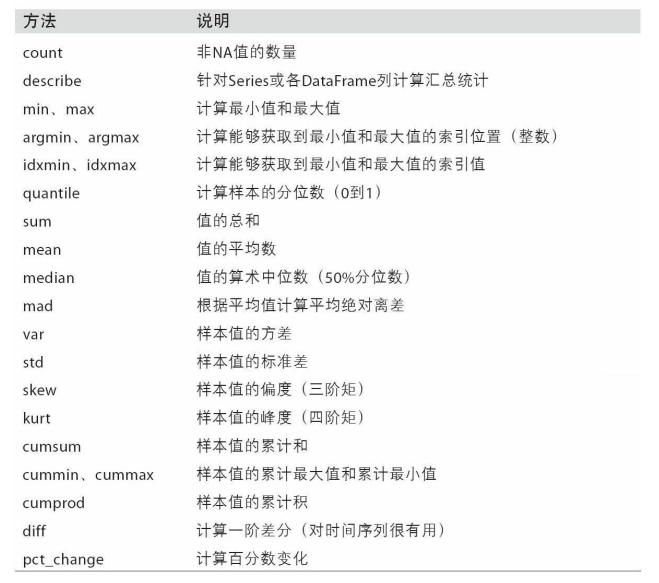

相关系数和协方差

唯一值， 值计数 以及成员资格 

In [154]:
obj=pd.Series(['c','a','d','a','a','b','b','c','c'])
uniques=obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [155]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [156]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [158]:
mask=obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [159]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object